# Lab: Trees

Lab associated with Module: Trees

***

In [83]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [84]:
import numpy as np

Following libraries have to be installed on your computer. Try to install graphviz by using: conda install python-graphviz

I made use of some of the following links to get rid of errors:
    
https://github.com/quadram-institute-bioscience/albatradis/issues/7

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

https://github.com/xflr6/graphviz/issues/68

https://github.com/RedaOps/ann-visualizer/issues/12


On my mac computer I had to install some packages using brew to get rid of following error: "ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH"

brew install graphviz

In [85]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Testing Visualization Package

Let us test this visualization Digraph Pacakge, it is only a tool for displaying tree or graph, this will come handy as it helps to visualize our solution.

In [86]:
dot = Digraph()

dot.node("1")
dot.node("2")
dot.edges(['12'])

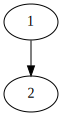

In [87]:
dot

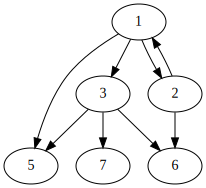

In [88]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')

# Add edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26'])

# Visualize the graph
dot

***

### Section 2: Creating a Binary Search Tree

Let us start by creating a BST

We will keep code simple in the sense that we will make a node class, and then build functions outside the class to implement various functionality.

In [109]:
class Node:
    
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None
        self.parent = None
        self.balance = 0

        
def get_height(node):
    if not node:
        return 0
    return node.height

def update_height(node):
    if not node:
        return
    node.height = 1 + max(get_height(node.left), get_height(node.right))

def get_balance(node):
    if not node:
        return 0
    return get_height(node.left) - get_height(node.right)




def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    return binaryTree(nodes, 0, len(nodes) - 1)
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return None
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    
    update_height(root)
    
    return root

def is_balanced(node):
    if not node:
        return True
    
    left_balanced = is_balanced(node.left)
    right_balanced = is_balanced(node.right)
    node_balance = get_balance(node)
    
    return left_balanced and right_balanced and abs(node_balance) <= 1


In [110]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test2 = [-1, 0, 9, 10]

In [111]:
test1_tree = buildBinaryTree(test1)
test2_tree = buildBinaryTree(test2)

We will make the simpler assumption that all the keys are unique when we are inserting

In [100]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

In [101]:
test3_tree = buildBinaryTree(test3)

Okay now that we have build three trees, let us visualize them. For visualization, we will have to write another function.

In [102]:
def visualize_tree(tree):
    def add_nodes_edges(tree, dot=None):
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val) + f"\n(h={tree.height})")

        if tree.left:
            dot.node(name=str(tree.left), label=str(tree.left.val) + f"\n(h={tree.left.height})")
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right), label=str(tree.right.val) + f"\n(h={tree.right.height})")
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    dot = add_nodes_edges(tree)
    display(dot)
    return dot

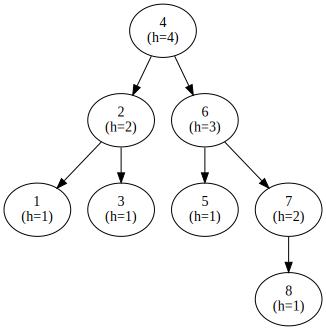

In [103]:
dot = visualize_tree(test1_tree)

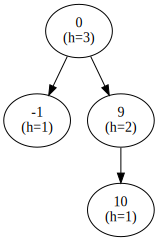

In [104]:
dot = visualize_tree(test2_tree)

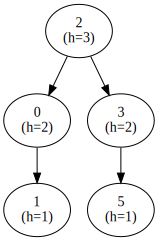

In [105]:
dot = visualize_tree(test3_tree)

***

### Section 3: Implementing Search, Insert and Delete Operations

Let us implement IDS operations on the BST we have built

Search operation should look like:

In [70]:
def search(nodes, val):

    if val == nodes.val:
        return True

    if val < nodes.val:
        
        if nodes.left == None:
            return False

        return search(nodes.left, val)

    elif val >= nodes.val:
        
        if nodes.right == None:
            return False

        return search(nodes.right, val)

In [71]:
search(test3_tree, 3)

True

In [72]:
search(test1_tree, 18)

False

Let us write insert function now:

In [73]:
def insert(nodes, val):

    # Empty Tree
    if nodes == None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left == None: 
            nodes.left = Node(val)
            return
        else:
            insert(nodes.left, val)
            return

    elif val >= nodes.val:
        
        if nodes.right == None:
            nodes.right = Node(val)
            return
        else:
            insert(nodes.right, val)
            return

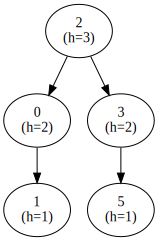

In [74]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

test3_tree = buildBinaryTree(test3)
dot = visualize_tree(test3_tree)

In [75]:
insert(test3_tree, -1.5)
dot = visualize_tree(test3_tree)

AttributeError: 'Node' object has no attribute 'height'

Let us write delete opertion. We will write another function minValueNode as well.

In [76]:
def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current

def delete(nodes, val):

    if nodes == None:  
        return nodes

    if val < nodes.val:
        
        #if nodes.left:
        nodes.left = delete(nodes.left, val)

    elif val > nodes.val:
        
        #if nodes.right:
        nodes.right = delete(nodes.right, val)

    else:
        
        # Node with only one child or no child
        
        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp
        
        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)
        
        nodes.val = temp.val
        
        nodes.right = delete(nodes.right, temp.val)
        
    return nodes

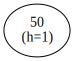

In [77]:
test3_tree = buildBinaryTree([50])
dot = visualize_tree(test3_tree)

In [78]:
insert(test3_tree, 50)
insert(test3_tree, 30)
insert(test3_tree, 20)
insert(test3_tree, 40)
insert(test3_tree, 70)
insert(test3_tree, 60)
insert(test3_tree, 80)
dot = visualize_tree(test3_tree)

AttributeError: 'Node' object has no attribute 'height'

In [79]:
delete(test3_tree, 50)
dot = visualize_tree(test3_tree)

AttributeError: 'Node' object has no attribute 'height'

***

### <font color='red'> Section 4: Now that you have a good understanding of BST, write down code for activities in the onTrack Task sheet, in the following section </font>

In [80]:
### TODO ###
### Good Luck ###
    








***